# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
## Observations
* While generating and anaylizing this data I found three observations. The first observation was that in the scatter plot of City Latitude vs. Max Temp the maxtemperature was around the 20 degree latitiude mark. I would've assumed that the max temperature would be by the equator line. The third observation is that there is a higher concentration of markers in the northern hemisphere vs wind speed than in the southern hemisphere. The last observation is that there is stronger concentration of max temperature in the northern hemisphere than in the southern hemisphere. An extra observation is that I the dream location to live is most likely in the southern hemisphere. Less concentration of max temp, cloudiness, humidity, and wind speed. 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_weather = []
print('Beginning Data Retrieval')
print('-----------------')
record = 1
set_ = 1


for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i >= 50): 
        set_ +=1 
        record = 0
    
    print(f'Processing Rrecord {record} of Set {set_} | {city}')
    
    record +=1
    
    
    try:
        
        response = requests.get(query_url + city).json()
        
        city = response['name']
        lat = response['coord']['lat']
        long =response['coord']['lon']
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness= response["clouds"]["all"]
        wind_speed =response["wind"]["speed"]
        country = response["sys"]["country"]
        city_time =datetime.datetime.fromtimestamp(response["dt"]+response["timezone"])
        
        city_weather.append({
            "City": city,
            "Lat": lat,
            "Long": long,
            "Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "County": country,
            "City Time" :city_time
        })
        
    except:
        print("city not found. Skipping") 
        pass
    
print("---------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
-----------------
Processing Rrecord 1 of Set 1 | bredasdorp
Processing Rrecord 2 of Set 1 | touros
Processing Rrecord 3 of Set 1 | busselton
Processing Rrecord 4 of Set 1 | rikitea
Processing Rrecord 5 of Set 1 | manyana
Processing Rrecord 6 of Set 1 | cape town
Processing Rrecord 7 of Set 1 | hobart
Processing Rrecord 8 of Set 1 | cayenne
Processing Rrecord 9 of Set 1 | mogadishu
Processing Rrecord 10 of Set 1 | kapaa
Processing Rrecord 11 of Set 1 | sentyabrskiy
city not found. Skipping
Processing Rrecord 12 of Set 1 | bac lieu
Processing Rrecord 13 of Set 1 | arraial do cabo
Processing Rrecord 14 of Set 1 | shimanovsk
Processing Rrecord 15 of Set 1 | kuche
city not found. Skipping
Processing Rrecord 16 of Set 1 | hermanus
Processing Rrecord 17 of Set 1 | ushuaia
Processing Rrecord 18 of Set 1 | punta arenas
Processing Rrecord 19 of Set 1 | laguna
Processing Rrecord 20 of Set 1 | pombal
Processing Rrecord 21 of Set 1 | puerto ayora
Processing Rrecord 22 of S

Processing Rrecord 35 of Set 4 | arroyo
Processing Rrecord 36 of Set 4 | chapais
Processing Rrecord 37 of Set 4 | lompoc
Processing Rrecord 38 of Set 4 | carutapera
Processing Rrecord 39 of Set 4 | ciudad bolivar
Processing Rrecord 40 of Set 4 | kieta
Processing Rrecord 41 of Set 4 | jamestown
Processing Rrecord 42 of Set 4 | bethel
Processing Rrecord 43 of Set 4 | mar del plata
Processing Rrecord 44 of Set 4 | port-gentil
Processing Rrecord 45 of Set 4 | dinsor
city not found. Skipping
Processing Rrecord 46 of Set 4 | san luis
Processing Rrecord 47 of Set 4 | saint-francois
Processing Rrecord 48 of Set 4 | haines junction
Processing Rrecord 49 of Set 4 | rawson
Processing Rrecord 0 of Set 5 | hearst
Processing Rrecord 1 of Set 5 | norsup
Processing Rrecord 2 of Set 5 | sinnamary
Processing Rrecord 3 of Set 5 | kalengwa
Processing Rrecord 4 of Set 5 | kaeo
Processing Rrecord 5 of Set 5 | chowchilla
Processing Rrecord 6 of Set 5 | emba
Processing Rrecord 7 of Set 5 | miyako
Processing R

Processing Rrecord 17 of Set 8 | bam
Processing Rrecord 18 of Set 8 | pangnirtung
Processing Rrecord 19 of Set 8 | winton
Processing Rrecord 20 of Set 8 | waipawa
Processing Rrecord 21 of Set 8 | hirara
Processing Rrecord 22 of Set 8 | cidreira
Processing Rrecord 23 of Set 8 | vozhega
Processing Rrecord 24 of Set 8 | san patricio
Processing Rrecord 25 of Set 8 | polovinnoye
Processing Rrecord 26 of Set 8 | ambon
Processing Rrecord 27 of Set 8 | khash
Processing Rrecord 28 of Set 8 | diamantino
Processing Rrecord 29 of Set 8 | iskateley
Processing Rrecord 30 of Set 8 | babu
Processing Rrecord 31 of Set 8 | asnaes
Processing Rrecord 32 of Set 8 | troitskoye
Processing Rrecord 33 of Set 8 | oktyabrskoye
Processing Rrecord 34 of Set 8 | dalbandin
Processing Rrecord 35 of Set 8 | aakirkeby
city not found. Skipping
Processing Rrecord 36 of Set 8 | mildura
Processing Rrecord 37 of Set 8 | brainerd
Processing Rrecord 38 of Set 8 | camacha
Processing Rrecord 39 of Set 8 | santo domingo
Processi

Processing Rrecord 2 of Set 12 | boddam
Processing Rrecord 3 of Set 12 | meulaboh
Processing Rrecord 4 of Set 12 | lokosovo
Processing Rrecord 5 of Set 12 | tahta
Processing Rrecord 6 of Set 12 | bougouni
Processing Rrecord 7 of Set 12 | louisbourg
city not found. Skipping
Processing Rrecord 8 of Set 12 | datong
Processing Rrecord 9 of Set 12 | dien bien
city not found. Skipping
Processing Rrecord 10 of Set 12 | chara
Processing Rrecord 11 of Set 12 | andenes
Processing Rrecord 12 of Set 12 | villa maria
Processing Rrecord 13 of Set 12 | dolbeau
city not found. Skipping
Processing Rrecord 14 of Set 12 | mana
Processing Rrecord 15 of Set 12 | bababe
city not found. Skipping
Processing Rrecord 16 of Set 12 | aparecida do taboado
Processing Rrecord 17 of Set 12 | carballo
Processing Rrecord 18 of Set 12 | sao joaquim
Processing Rrecord 19 of Set 12 | pakala
Processing Rrecord 20 of Set 12 | vila velha
Processing Rrecord 21 of Set 12 | kusk
city not found. Skipping
Processing Rrecord 22 of

In [71]:
len(city_weather)

568

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
city_df = pd.DataFrame(city_weather)
city_df

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed,County,City Time
0,Bredasdorp,-34.5322,20.0403,17.00,88,34,3.09,ZA,2021-05-04 18:47:31
1,Touros,-5.1989,-35.4608,24.00,94,75,2.06,BR,2021-05-04 13:47:32
2,Busselton,-33.6500,115.3333,15.00,97,100,3.84,AU,2021-05-05 00:47:32
3,Rikitea,-23.1203,-134.9692,25.89,79,98,5.24,PF,2021-05-04 07:47:32
4,Manyana,-23.4000,21.7167,14.39,42,0,2.66,BW,2021-05-04 18:47:33
...,...,...,...,...,...,...,...,...,...
563,Ormara,25.2088,64.6357,28.25,69,1,5.33,PK,2021-05-04 21:50:42
564,Tyube,43.0493,47.3074,16.00,72,40,15.00,RU,2021-05-04 19:50:42
565,Samarai,-10.6167,150.6667,27.17,78,57,5.75,PG,2021-05-05 02:50:42
566,Itarema,-2.9248,-39.9167,24.50,90,88,3.07,BR,2021-05-04 13:50:43


In [84]:
city_df.to_csv("city_weather.csv")

In [75]:
city_df.describe()

,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,20.762757,16.245586,16.491567,69.984155,54.373239,3.422289
std,33.454352,88.027925,9.999123,22.394052,38.520635,2.315799
min,-54.800000,-175.200000,-8.000000,1.000000,0.000000,0.180000
25%,-6.648600,-58.671850,8.890000,58.000000,16.000000,1.682500
50%,25.750900,20.087500,17.220000,76.000000,64.000000,3.090000
75%,49.162725,84.723450,25.000000,87.000000,92.000000,4.630000
max,78.218600,179.316700,36.210000,100.000000,100.000000,15.430000


In [ ]:
# city_time =datetime.datetime.fromtimestamp(response["dt"]+response["timezone"])
# cities_pd["Datetime"]=city_time.strftime("%m/%d/%Y, %H:%M:%S")


# cities_pd.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

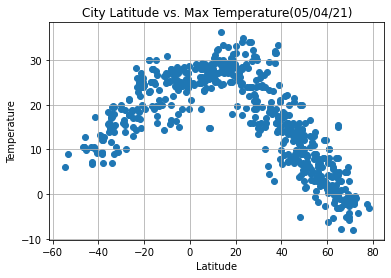

In [149]:
x_values = city_df['Lat']
y_values = city_df['Temp']
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Max Temperature(05/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("CityLatitudevsMaxTemperature.png")

## Latitude vs. Humidity Plot

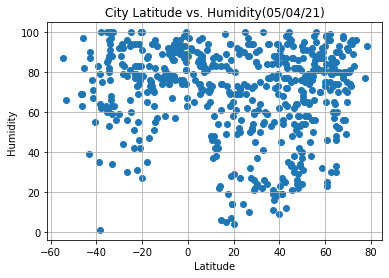

In [150]:
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Humidity(05/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig('LatvsHumid.png')

## Latitude vs. Cloudiness Plot

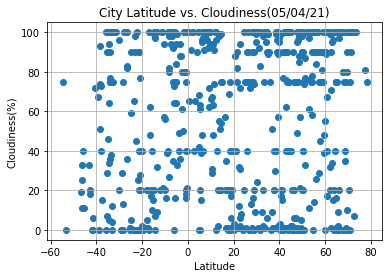

In [151]:
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Cloudiness(05/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig('LatvsCloudiness.png')

## Latitude vs. Wind Speed Plot

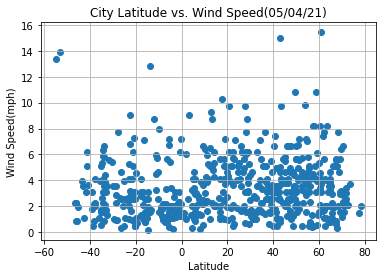

In [152]:
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Wind Speed(05/04/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()
plt.savefig('LatvsWindSpeed.png')

## Linear Regression

In [153]:
northern_hemi = city_df.loc[city_df["Lat"]>0.01]
southern_hemi = city_df.loc[city_df["Lat"]<-0.01]
southern_hemi


,City,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed,County,City Time
0,Bredasdorp,-34.5322,20.0403,17.00,88,34,3.09,ZA,2021-05-04 18:47:31
1,Touros,-5.1989,-35.4608,24.00,94,75,2.06,BR,2021-05-04 13:47:32
2,Busselton,-33.6500,115.3333,15.00,97,100,3.84,AU,2021-05-05 00:47:32
3,Rikitea,-23.1203,-134.9692,25.89,79,98,5.24,PF,2021-05-04 07:47:32
4,Manyana,-23.4000,21.7167,14.39,42,0,2.66,BW,2021-05-04 18:47:33
...,...,...,...,...,...,...,...,...,...
551,Maragogi,-9.0122,-35.2225,25.11,78,39,1.82,BR,2021-05-04 13:50:38
557,Sorong,-0.8833,131.2500,25.83,85,100,2.20,ID,2021-05-05 01:47:19
558,Namatanai,-3.6667,152.4333,27.90,76,36,0.26,PG,2021-05-05 02:50:40
565,Samarai,-10.6167,150.6667,27.17,78,57,5.75,PG,2021-05-05 02:50:42


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7696565880524342


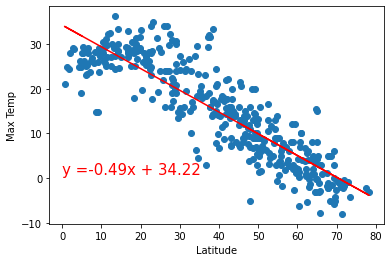

In [154]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (0,1), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Northern tempvslat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5911815189398851


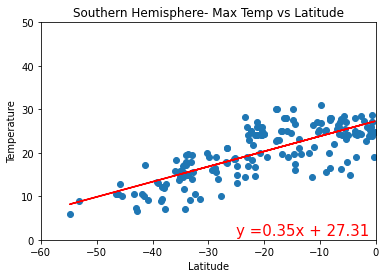

In [155]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (-25,1), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere- Max Temp vs Latitude")
print(f"The r-value is: {rvalue**2}")
plt.ylim(0,50)
plt.xlim(-60,0)
plt.savefig("Southern tempvslat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007165867349077822


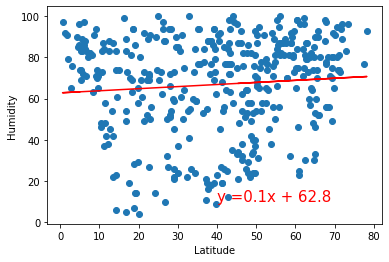

In [156]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (40,10), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Northern humidityvslat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05378900931930603


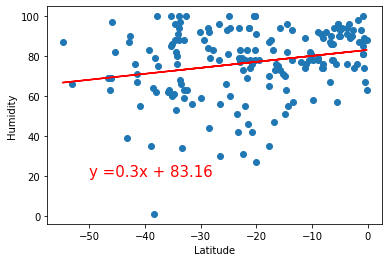

In [157]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (-50,20), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Southern humidityvslat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001941744543482891


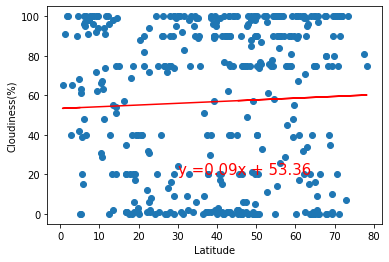

In [158]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (30,20), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Northern cloudinessvslat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041511838128139036


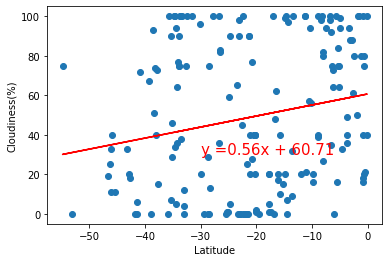

In [159]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (-30,30), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Southern cloudinessvslat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00020543564409995695


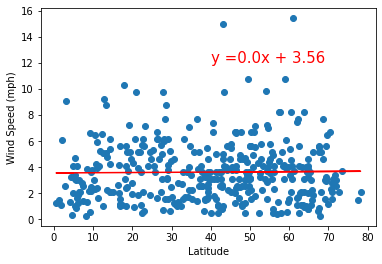

In [160]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (40,12), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Northern windspeedvslat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.033021837875318184


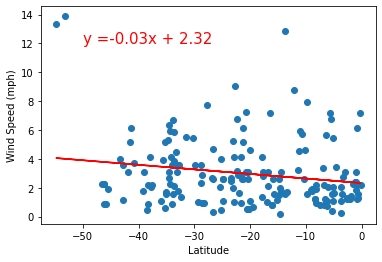

In [161]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (-50,12), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue**2}")

plt.savefig("Southern windspeedvslat.png")